<a href="https://colab.research.google.com/github/adrianadamata/Data_Science_Fraudes_em_Compras_online/blob/main/PROJETO_Fraudes_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

Pesquisas indicam o aumento do uso de cartões de crédito, no cenário de pandemia. O alerta do risco de propagação do novo coronavírus acelerou as mudanças de hábito nas compras. A maioria dos consumidores têm preferido evitar a movimentação de dinheiro. Além disso, uma nova tecnologia foi disseminada durante o ano de 2020: o pagamento por aproximação do cartão.O pagamento por aproximação acontece por meio de uma tecnologia chamada NFC (Near Field Communication). Desta forma, o pagamento por meio do cartão torna-se uma opção mais segura de pagamento, em relação à contaminação. 

Tudo isso favoreceu o crescimento de compras por cartão. Com o isolamento social, as compras online foram mais necessárias e com isso, o pagamento através de cartão de crédito. Para garantir segurança nas compras online, faz-se necessário um controle de fraudes em cartões de crédito. É importante para as instituições financeiras conquistar a confiança de seus clientes e assegurar agilidade nas compras. 

Além disso, os prejuízos podem representar grandes quantias. Compras realizadas através de fraudes podem comprometer a segurança do cliente, bem como acarretar sérios prejuízos. Para detectar fraudes, algoritmos de Machine Learning utilizam o histórico de bancos de dados para identificar e impedir compras suspeitas. No entanto, o algoritmo deve ser otimizado para não impedir compras reais, o que geraria transtorno ao cliente. 

Por isso, com o auxílio da Ciência de Dados, é possível otimizar tais algoritmos de Machine Learning para viabilizar o máximo de compras reais e impedir compras fraudulentas com maior precisão. Pequenas melhorias podem representar grandes quantias nos resultados finais.

Neste projeto, iremos abordar fraudes em cartões de crédito.
Um levantamento da Câmara de Dirigentes Lojistas (CNDL) em conjunto com o Serviço de Proteção ao Consumidor (SPC) mostra que em 12 meses, os prejuízos chegaram a R$ 1,8 bilhão e afetou mais de 12 milhões de brasileiros.

<p align=center>
<img src="https://raw.githubusercontent.com/adrianadamata/Data_Science_Fraudes_em_Compras_online/main/Roubo_Cartao.jpg"
 width="60%"></p>


## Importando os Dados

No conjunto de dados disponibilizado pelo [kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud) as variáveis disponibilizadas são numéricas e foram extraídas de dados disponibilizados por  empresas européias de cartão de crédito. Para garantir a confidencialidade das informações, as colunas são representados por $[V1, V2, V3 \dots, V28]$. Além disso, as variáveis foram selecionadas por meio de Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A técnica de PCA permite a redução da dimensionalidade, extraindo as *features* que melhor representam o *dataset*, os chamados **componentes**.

Segundo dados disponibilizados no Kaggle, o *dataset* contém transações realizadas por cartões de crédito no período de dois dias do mês de setembro de 2013, onde temos 492 fraudes no total de 284.807 transações. Por isso, o conjunto de dados é altamente desequilibrado: a classe positiva (fraudes) é responsável por apenas 0,172% de todas as transações.


In [1]:
pip install scikit-plot

In [2]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from sklearn import svm

from imblearn.under_sampling import RandomUnderSampler

#estilo dos gráficos com o Seaborn
sns.set_style('dark')


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


No Curso de Data Science na Prática, o conjunto de dados foi disponibilizado no dropbox em formato `csv`, conforme *link* abaixo.


In [3]:
link_data = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(link_data)

Com os dados já estão tratados, estão prontos para a modelagem de algoritmo de *Machine Learning*. Para isso, faremos uma breve Análise Exploratória.

## Análise Exploratória



Para visualizarmos a estrutura do DataFrame, as primeiras cinco entradas estão listadas abaixo. É possível observar que as colunas estão descaracterizadas para preservar a segurança da origem dos dados. A variável `Time` representa o número de segundos decorridos entre esta transação e a primeira transação no conjunto de dados
e `Amount`é o montante da transação.
A feature `Class` indica a classificação das transações: 

* Se fraudulentas = 1; 
* Caso contrário = 0.

In [4]:
#5 primeiras entradas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


As informações estatísticas do DataFrame são obtidas através do método `describe()`. 
Através desse panorama é possível observar uma discrepância no conjunto de dados da coluna `Class`. A maioria do conjunto representa transações não fraudulentas. Este é um ponto importante para os dados de treino do modelo de Machine Learning.


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<FONT COLOR="#FFFF00">**Também é possível observar que a média de valor das transações é de 88.34. No entanto, ao agrupar por tipo de transação, é possível observar que esta média é representativa para as transações não fraudulentas. 
Em transações fraudulentas, a média do valor da transação foi maior (122.21).**</FONT> 

In [6]:
df.groupby(["Class"]).mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Não foram encontrados valores ausentes:

In [7]:
# ver se há valores ausentes
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Visualização gráfica da quantidade de transações fraudulentas no Dataset:

In [8]:
#quantidade de transações não-fraudulentas(0) e fraudulentas(1)
print(df.Class.value_counts())
print("\nA porcentagem neste conjunto é de {:.2f}% de fraudes.".format(df[df.Class == 1].shape[0] / df.shape[0] * 100))

0    284315
1       492
Name: Class, dtype: int64

A porcentagem neste conjunto é de 0.17% de fraudes.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


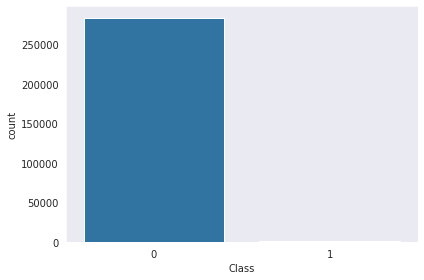

In [9]:
#gráfico de barras para as classes:
fig, ax = plt.subplots()
sns.countplot("Class", data=df, ax=ax)
plt.tight_layout()

In [10]:
df.groupby(["Class"])['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


O número de fraudes detectado neste dataset é de 492 fraudes. A média de valor destas transações fraudulentas foi de 122.21

No entanto, a mediana indica o valor de 9.25

Observa-se então que metade destas transações tiveram valores inferiores a 9.25

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


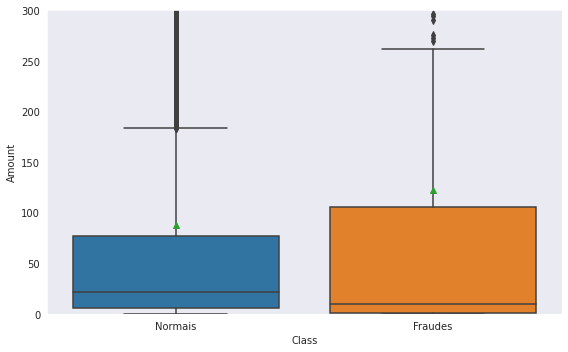

In [11]:
fig, ax = plt.subplots(figsize=(8,5), sharex=True)

sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
plt.ylim((0, 300))
plt.xticks([0, 1], ['Normais', 'Fraudes'])

plt.tight_layout()

No geral, percebe-se uma distribuição diferente para as duas classes, o que provavelmente irá contribuir para o treinamento do modelo de *machine learning*.

## Preparação dos Dados

Para alimentar o modelo, todos os dados precisam estar normalizados. Por isso as features `Time` e `Amount` serão normalizadas.
Como é possível observar a presença de outliers através do boxplot,  a padronização será por meio da classe `StandardScaler`.

In [12]:
# padronizar as colunas Time e Amount
df_clean = df.copy()

#reshape
scaler = StandardScaler()
df_clean['Amount'] = scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['Time'] = scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

# ver as primeiras entradas
df_clean.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


##Dividir Dados de Treino e Dados de Teste

A divivisão do dataset em:
* Conjunto de Treino
* Conjunto para Teste

Deve manter a mesma proporção de  classes, para isso será utilizado `stratify=True`

In [13]:
# Y contém a classe das operações
y = df['Class']

# X contém as demais variáveis
X = df_clean.drop('Class', axis=1)


# conjunto de treino e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

## Balanceamento dos Dados
Para balancear os dados foi utilizada a biblioteca `imblearn.under_sampling`. Para preservar os dados de operações fraudulentas (classe com menor representatividade), a opção neste projeto foi usar `Under-Sampling`.

1    369
0    369
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


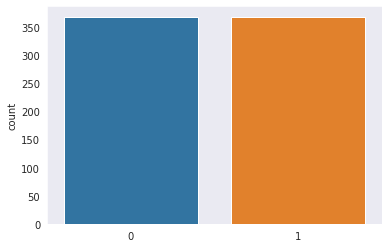

In [14]:
# técnica Under-Sampling
US = RandomUnderSampler()
X_US, y_US = US.fit_sample(X_train, y_train)

# visão do balanceamento
print(pd.Series(y_US).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_US);

Após o balanceamento dos dados é possível estabelecer as variáveis que estão mais fortemente correlacionadas. O mapa de calor abaixo mostra a diferença dos dados desbalanceados e balanceados, indicando a correlação entre as variáveis.

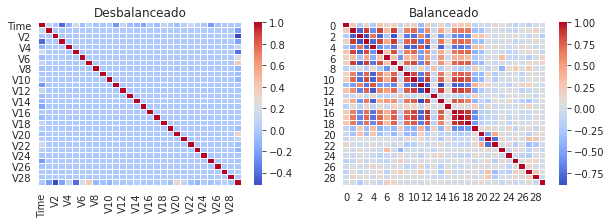

In [15]:
# matriz de correlação das variáveis armazenadas em X
corr = X_train.corr() #dados de treino
corr_US = pd.DataFrame(X_US).corr() #dados balanceados


fig, ax = plt.subplots(1, 2, figsize = (10,3))

sns.heatmap(corr, linewidths=.01, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_US, linewidths=.01, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

## Modelos de Machine Learning
### Modelo de Regressão Logística

Primeiramente, o modelo foi treinado a partir de Regressão Logística, que é considerada uma técnica estatística simples para a predição de valores tomados por uma variável categórica, frequentemente binária.

In [16]:
# modelo de Regressão Logística
np.random.seed(2)
model_RL = LogisticRegression()
model_RL.fit(X_US, y_US)

# previsão
y_predict = model_RL.predict(X_test)
y_proba = model_RL.predict_proba(X_test)

O `y_predict` armazena um array contendo a classificação da previsão para os dados de teste.
O `y_proba`armazena as probabilidades de cada item classificado por meio da previsão do modelo de Regressão Logística.

In [17]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
y_proba

array([[0.87863676, 0.12136324],
       [0.98720356, 0.01279644],
       [0.98632631, 0.01367369],
       ...,
       [0.99349066, 0.00650934],
       [0.97686658, 0.02313342],
       [0.76191345, 0.23808655]])

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9714    0.9854     71079
           1     0.0517    0.9024    0.0978       123

    accuracy                         0.9712     71202
   macro avg     0.5258    0.9369    0.5416     71202
weighted avg     0.9982    0.9712    0.9839     71202

Acurácia: 0.9712

AUC: 0.9369



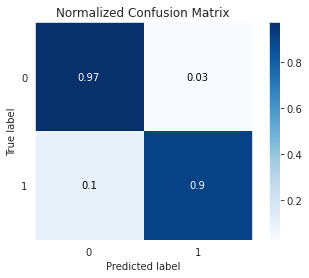

In [19]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_predict, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_predict, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_predict)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_predict)))

## Avaliação do desempenho do modelo de Regressão Logística

Como o problema encontra-se originalmente desbalanceado, a acurácia não é uma métrica adequada. No blog [Sigmoidal](http://sigmoidal.ai/como-lidar-com-dados-desbalanceados/), é possível entender que a acurácia pode ser elevada e detectar menos de 60% das fraudes.

Observe a matriz de confusão para ver a taxa de acertos para transações fraudulentes, ou pela coluna *recall* do Relatório de Classificação. 

Uma métrica interessante para se avaliar a eficácia é a [AUC ROC](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772), a área sob a curva. No caso desse modelo de Regressão Logística, tem-se 93.7% de AUC.

### Modelo Support Vector Machines (SVM)

SVM é um algoritmo de classificação binária. Dispondo as observações em um plano procuram otimizar as margens que melhor separam as observações. Neste trabalho, foram aplicados os métodos chamados de Support Vector Classifier (SVC).

In [24]:
# modelo SVM
model_SVM = svm.SVC()
model_SVM.fit(X_US, y_US)

# previsão
y_predict_new = model_SVM.predict(X_test)


## Avaliação do desempenho do modelo SVM

É possível observar que embora a quantidade de detectar fraudes foi maior no modelo SVM-SVC, a quantidade de falsos positivos aumentou de 0.10 no modelo anterior para 0.14


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9893    0.9945     71079
           1     0.1223    0.8618    0.2141       123

    accuracy                         0.9891     71202
   macro avg     0.5610    0.9255    0.6043     71202
weighted avg     0.9982    0.9891    0.9932     71202

Acurácia: 0.9891

AUC: 0.9255



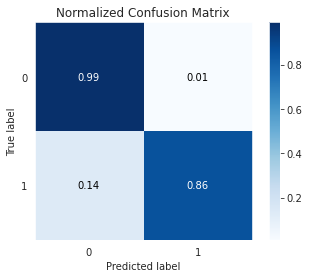

In [25]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_predict_new, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_predict_new, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_predict_new)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_predict_new)))

## Conclusões
Ao comparar dois algoritmos de Classificação é possível perceber que o aumento da acurácia pode ser acompanhado de um aumento em falsos positivos. Em casos de compras com cartões de crédito, um modelo que permite uma maior incidência de falso positivo gerará transtornos aos clientes reais. Ao tentar realizar uma compra, a chance de ser identificado como fraude acusará um falso positivo. Por isso, apesar do Modelo SVM apresentar aumento de acurácia (98.91%) em relação ao Modelo de Regressão Logística (97.12%), o número de falsos positivos chega a um aumento de 4%. Tal fato deve ser bem estudado pelos dados de uma empresa de cartões para evitar um aumento de transtornos com compras legítimas.
